In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [3]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

dataTraining = dataTraining.drop_duplicates()
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
dataTraining.shape

(7894, 5)

In [5]:
# el indice 0 (NO OLVIDAR deberia poner un par de ejemplos de cada tema tal vez un heat)
dataTraining['plot'][0]

"major benson winifred payne is being discharged from the marines .  payne is a killin '  machine ,  but the wars of the world are no longer fought on the battlefield .  a career marine ,  he has no idea what to do as a civilian ,  so his commander finds him a job  -  commanding officer of a local school ' s jrotc program ,  a bunch or ragtag losers with no hope .  using such teaching tools as live grenades and real bullets ,  payne starts to instill the corp with some hope .  but when payne is recalled to fight in bosnia ,  will he leave the corp that has just started to believe in him ,  or will he find out that killin '  ain ' t much of a livin '  ?"

<Axes: xlabel='plot'>

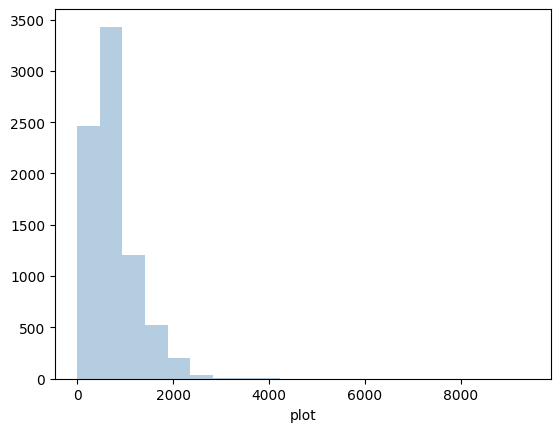

In [6]:
comment_len = dataTraining['plot'].str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [7]:
print(f'numero de combinaciones de generos: {dataTraining['genres'].nunique()}')

numero de combinaciones de generos: 1336


In [8]:
dataTraining['genres'].unique()

array(["['Short', 'Drama']", "['Comedy', 'Crime', 'Horror']",
       "['Drama', 'Film-Noir', 'Thriller']", ...,
       "['Crime', 'Film-Noir', 'Romance', 'Thriller']",
       "['Adventure', 'Musical', 'Fantasy', 'Comedy', 'Romance']",
       "['Animation', 'Adventure', 'Drama', 'Family', 'Fantasy', 'Sci-Fi']"],
      dtype=object)

In [9]:
dataTraining[dataTraining['genres'] == "['Short', 'Drama']"].head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0


In [10]:
dataTraining[dataTraining['genres'] == "['Comedy', 'Crime', 'Horror']"].head()

,year,title,plot,genres,rating
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
1923,1972,Pink Flamingos,"the filthiest person alive , divine , is usi...","['Comedy', 'Crime', 'Horror']",6.1
1149,1959,A Bucket of Blood,"walter paisley , nerdy busboy at a bohemian c...","['Comedy', 'Crime', 'Horror']",6.8
4429,1971,The Abominable Dr. Phibes,"anton phibes , celebre organista , dato per ...","['Comedy', 'Crime', 'Horror']",7.2


In [11]:
dataTraining[dataTraining['genres'] == "['Drama', 'Film-Noir', 'Thriller']"].head()

,year,title,plot,genres,rating
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
2585,1951,Fourteen Hours,while on patrol on lower manhattan on st . pa...,"['Drama', 'Film-Noir', 'Thriller']",7.2
6995,1949,Beyond the Forest,rosa moline is bored with life in a small town...,"['Drama', 'Film-Noir', 'Thriller']",7.2
9008,1945,Scarlet Street,"in new york , christopher cross is celebratin...","['Drama', 'Film-Noir', 'Thriller']",7.9
811,1949,Caught,it was leonora eames ' childhood dream come t...,"['Drama', 'Film-Noir', 'Thriller']",7.1


In [12]:
grouped = dataTraining.groupby('genres')
result = grouped['rating'].agg(['min', 'mean', 'median', 'max'])
result = result.reset_index()
result = result.sort_values(by=['max'], ascending=True)
result.head(10)

,genres,min,mean,median,max
500,"['Animation', 'Action', 'Comedy', 'Family', 'F...",1.7,1.7,1.7,1.7
262,"['Action', 'Fantasy', 'Sci-Fi']",1.9,1.9,1.9,1.9
265,"['Action', 'Fantasy']",2.2,2.2,2.2,2.2
887,"['Crime', 'Action', 'Drama']",2.4,2.4,2.4,2.4
703,"['Comedy', 'Crime', 'Family', 'Sci-Fi']",2.5,2.5,2.5,2.5
1232,"['Fantasy', 'Sci-Fi']",2.5,2.5,2.5,2.5
201,"['Action', 'Crime', 'Sci-Fi']",2.7,2.7,2.7,2.7
800,"['Comedy', 'Family', 'Music']",2.8,2.8,2.8,2.8
27,"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",3.0,3.0,3.0,3.0
225,"['Action', 'Drama', 'Horror', 'Western']",3.0,3.0,3.0,3.0


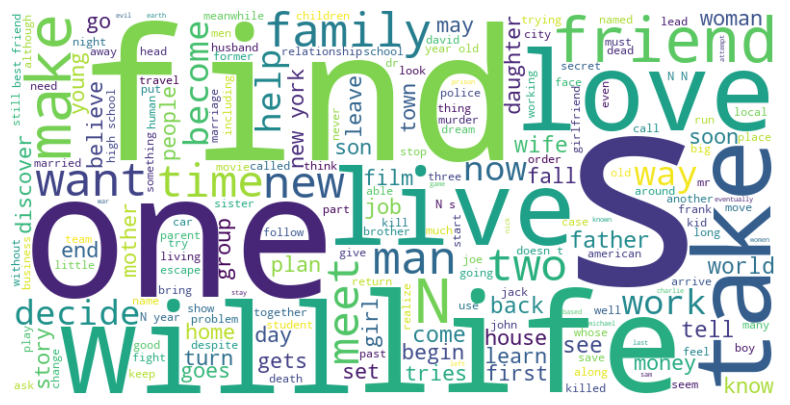

In [13]:
texto_completo = " ".join(dataTraining['plot'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Visualización
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

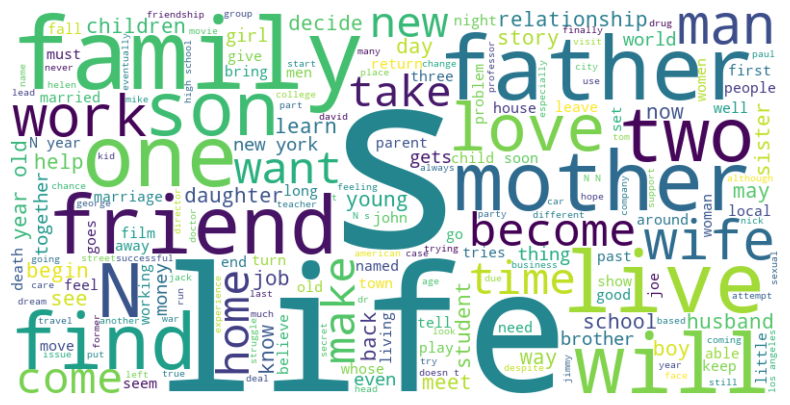

In [19]:
texto_completo = " ".join(dataTraining[dataTraining['genres'] == "['Drama']"]['plot'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Visualización
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

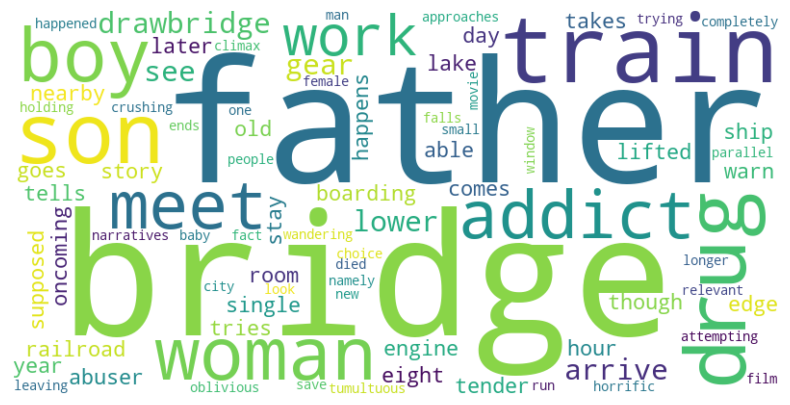

In [14]:
texto_completo = " ".join(dataTraining[dataTraining['genres'] == "['Short', 'Drama']"]['plot'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Visualización
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

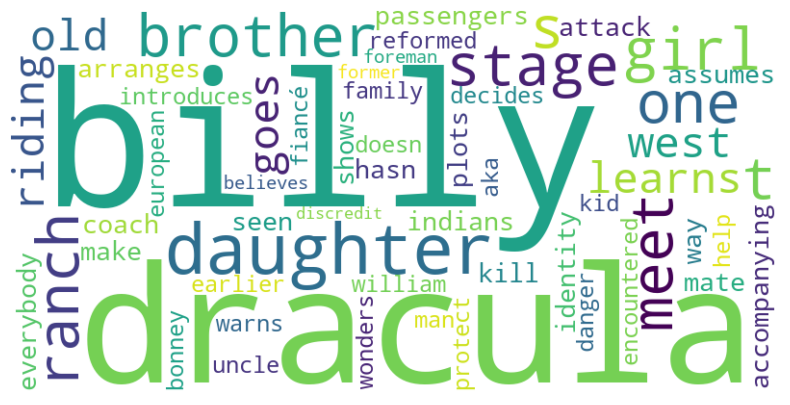

In [15]:
texto_completo = " ".join(dataTraining[dataTraining['genres'] == "['Action', 'Drama', 'Horror', 'Western']"]['plot'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Visualización
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

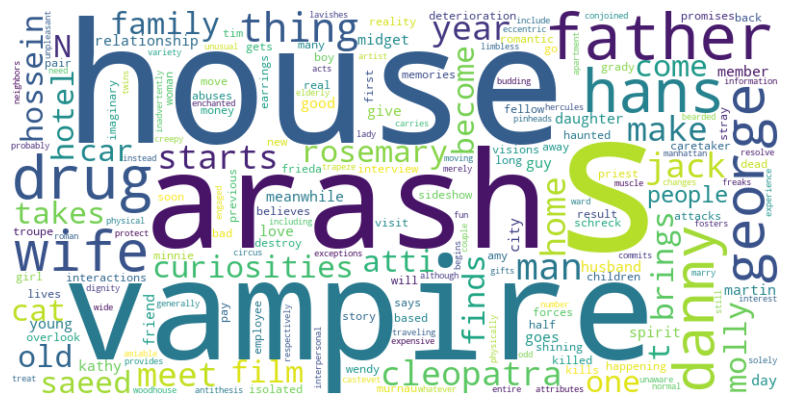

In [20]:
texto_completo = " ".join(dataTraining[dataTraining['genres'] == "['Drama', 'Horror']"]['plot'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Visualización
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# dataTraining.insert(0, 'count', 1)
# dataTraining.head()

,count,year,title,plot,genres,rating
3107,1,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,1,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [17]:
# fig = px.line(dataTraining, x="year", y="count", color='genres')
# fig.show()

In [18]:
print('Ok_')

Ok_
